# DATA 620: Web Analytics 

## Week Three - Part 2 - Assignment

**Team 3 - Rafal Decowski, Tze Fung Lung, Yun Mai, Ahsanul Choudhury**

## Problem

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1.Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2.Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
            
3.Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html
                
What can you infer about the relationships between (1) the women, and (2) the social events?  


## Solution

In [2]:
# Import modules
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Data and Graphs
The Davis Southern Club Women data set is available here - http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat. This data set is also included with the NetworkX package. The data set here is included with the NetworkX package and it comes as a bipartite graph (clubs, women).

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women.

In [5]:
# Get data
G = nx.davis_southern_women_graph()
G.graph.viewitems()

dict_items([('top', ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']), ('bottom', ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'])])

The 'top' nodes are women and 'bottom' nodes are events.

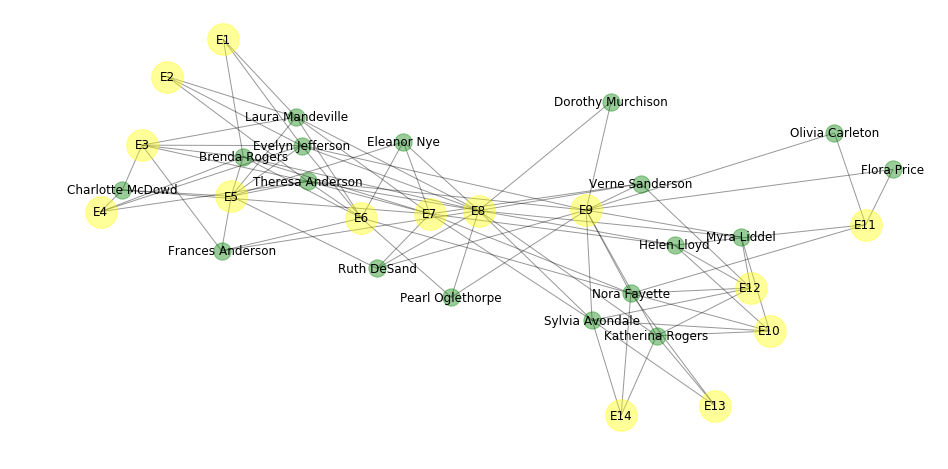

In [6]:
# Visualize the 2-mode network
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

In [4]:
# Summary statistics
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


## Relationships Between the Women

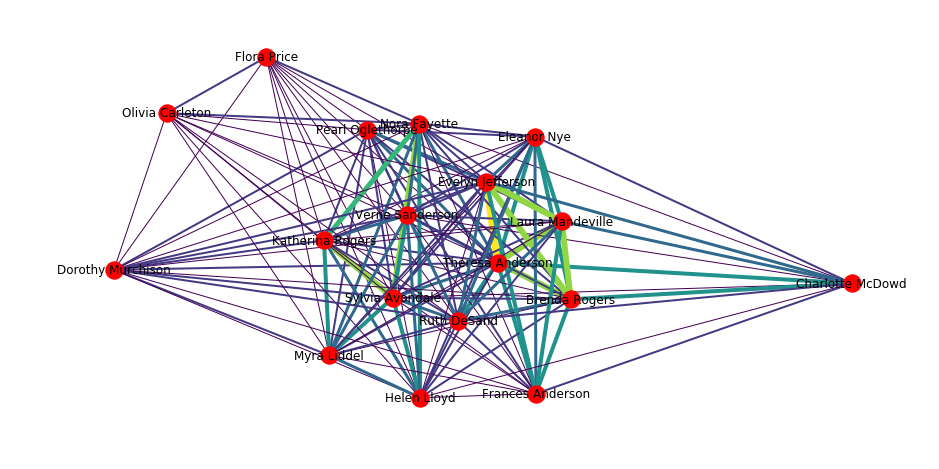

In [25]:
# Visualize weighted women network
# Code adapted from Social Network Analysis for Stratups, Chapter 5, page 102
women = G.graph['top']
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [6]:
# Summary statics for women network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


The network among the women is very well connected, on average the women are related to average of 15 other women.

In [7]:
# Function to view sorted list with values
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

In [8]:
# Women degree centrality
d_W = W.degree(W)
d_W = sorted_map(d_W)
pd.DataFrame(d_W, columns=["Women", "Degree"])

,Women,Degree
0,Evelyn Jefferson,17
1,Helen Lloyd,17
2,Nora Fayette,17
3,Ruth DeSand,17
4,Sylvia Avondale,17
5,Theresa Anderson,17
6,Verne Sanderson,17
7,Dorothy Murchison,16
8,Katherina Rogers,16
9,Myra Liddel,16


Evelyn, Helen, Nora, Ruth, Sylvia, Theresa and Vern has the most connections at 17 and Charlotte has the least at 11.

In [9]:
# Women betweeness centrality
btw_W = nx.betweenness_centrality(W)
btw_W = sorted_map(btw_W)
pd.DataFrame(btw_W, columns=["Women", "Betweenness"])

,Women,Betweenness
0,Evelyn Jefferson,0.010122
1,Helen Lloyd,0.010122
2,Nora Fayette,0.010122
3,Ruth DeSand,0.010122
4,Sylvia Avondale,0.010122
5,Theresa Anderson,0.010122
6,Verne Sanderson,0.010122
7,Dorothy Murchison,0.005348
8,Katherina Rogers,0.005348
9,Myra Liddel,0.005348


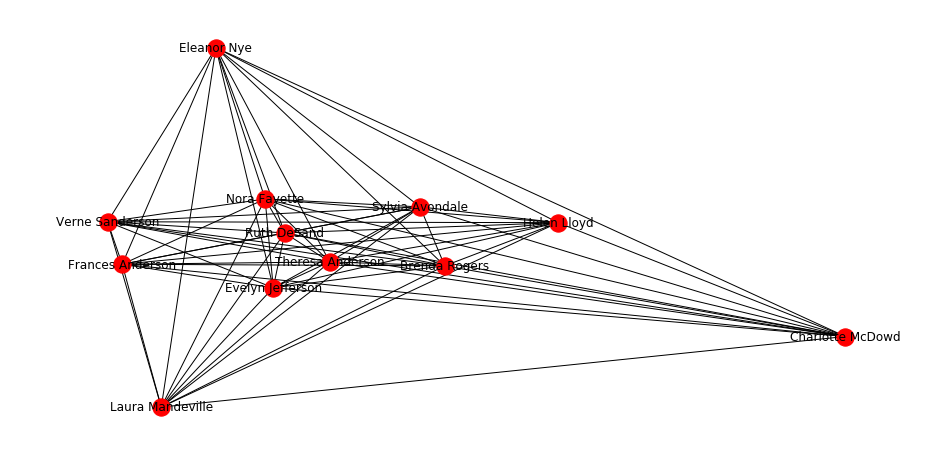

In [10]:
# Ego Network
# Charlotte McDowd's network
char = nx.ego_graph(W, 'Charlotte McDowd')
nx.draw_networkx(char, k=0.1, iterations=20)
plt.axis('off')
plt.show()

The above graph showing Charlotte McDowd's' Ego Network, she has 11 other women in her network

In [11]:
# Women Cliques
list(nx.find_cliques(W))

[['Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Charlotte McDowd',
  'Laura Mandeville',
  'Frances Anderson',
  'Brenda Rogers',
  'Eleanor Nye'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Pearl Oglethorpe',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Olivia Carleton',
  'Flora Price'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Ruth DeSand',
  'Evelyn Jefferson',
  'Helen Lloyd',
  'Pearl Oglethorpe',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson',
  'Brenda Rogers']]

The cliques are large, most of the women are part of more then on clique.

In [12]:
# Hierarchical clustering
# Code adapted from Social Network Analysis for Stratups, Chapter 4, page 84
from collections import defaultdict
import numpy
from scipy.cluster import hierarchy
from scipy.spatial import distance
def create_hc(G, t=1.0):
    labels = G.nodes()
    path_length = nx.nx.all_pairs_shortest_path_length(G)
    distances = numpy.zeros((len(G), len(G)))
    i = 0
    for u,p in path_length.items():
        j=0
        for v,d in p.items():
            distances[i][j] = d
            distances[j][i] = d
            if i==j: 
                distances [i][j] = 0
            j+=1
        i+=1    
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)
    membership = list(hierarchy.fcluster(Z, t=t))
    partition = defaultdict(list)
    for n,p in zip(list(range(len(G))), membership):
        partition[p].append(labels[n])
    return list(partition.values())

create_hc(W,)

[['Theresa Anderson',
  'Flora Price',
  'Katherina Rogers',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Olivia Carleton',
  'Dorothy Murchison',
  'Evelyn Jefferson',
  'Myra Liddel'],
 ['Pearl Oglethorpe',
  'Brenda Rogers',
  'Eleanor Nye',
  'Frances Anderson',
  'Ruth DeSand',
  'Laura Mandeville',
  'Charlotte McDowd',
  'Helen Lloyd']]

## Relationships Between the Social Events

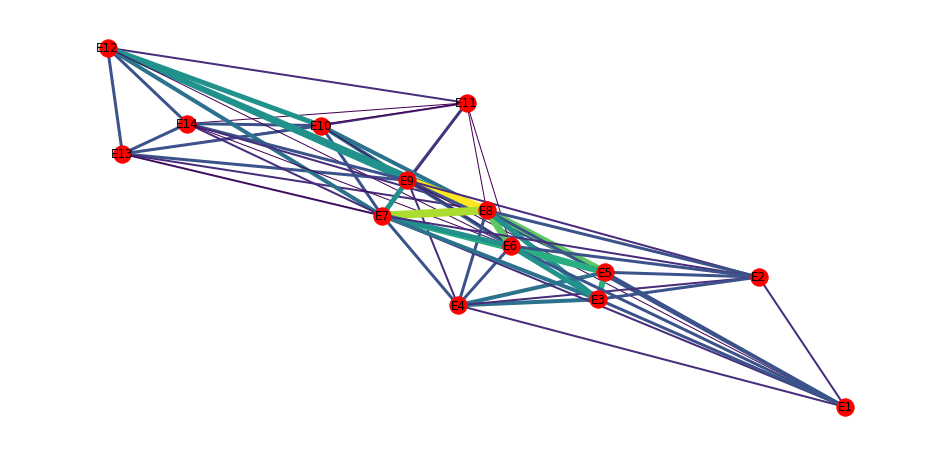

In [13]:
# Visualize weighted events network
# Code adapted from Social Network Analysis for Stratups, Chapter 5, page 102
clubs = G.graph['bottom']
E = bipartite.weighted_projected_graph(G, clubs,ratio=False)
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [14]:
# Summary metrics for events
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


The network among the events is also very well connected, on average each event share 9 women participants.

In [15]:
# Events degree centrality
d_E = E.degree(E)
d_E = sorted_map(d_E)
pd.DataFrame(d_E, columns=["Social Events", "Degree"])

,Social Events,Degree
0,E6,13
1,E7,13
2,E8,13
3,E9,13
4,E1,8
5,E10,8
6,E11,8
7,E12,8
8,E13,8
9,E14,8


E6, E7, E8, and E9 shares 13 women participants with another event, E1, E2, E3, E4, E5, E10, E11, E12, E13 and E14 shares 8 women participants with another event.

In [16]:
# Events betweeness centrality
btw_E = nx.betweenness_centrality(E)
btw_E = sorted_map(btw_E)
pd.DataFrame(btw_E, columns=["Social Events", "Betweenness"])

,Social Events,Betweenness
0,E6,0.080128
1,E7,0.080128
2,E8,0.080128
3,E9,0.080128
4,E1,0.000000
5,E10,0.000000
6,E11,0.000000
7,E12,0.000000
8,E13,0.000000
9,E14,0.000000


In [17]:
# Events cliques
list(nx.find_cliques(E))

[['E9', 'E8', 'E7', 'E6', 'E11', 'E10', 'E13', 'E12', 'E14'],
 ['E9', 'E8', 'E7', 'E6', 'E5', 'E4', 'E1', 'E3', 'E2']]

In [18]:
# Hierarchical clustering
create_hc(E,1)

[['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E8', 'E7'],
 ['E5', 'E4', 'E6', 'E1', 'E3', 'E2']]

# Conclusion
We can see that events and attendees are closely connected. There were no unconnected nodes.

Certain events were more attended, and some women attended more events than average. Seven out of 18 women had a centrality measure of 0.010 or higher. Four out of 14 events -- numbers 6, 7, 8 and 9-- had a centrality measure of 0.08 or higher. Strong centrality for these nodes was visible in the graph projections, as the nodes were centrally located and closely connected.

Three women had a lower participation rate as indicated by their degree and centrality measures. Even in this less involved group, each woman attended at least two events. Two subgroups were indicated by the network projection graphs, where closely connected women were likely to attend the same events.


# Reference

Tsvetovat, Maksim, and Alexander Kouznetsov. ***Social Network Analysis for Startups***. OReilly, 2012.

https://stackoverflow.com/questions/26767838/selecting-values-from-python-dictionaries-and-string-into-new-dicts/26767876#26767876